In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_fisher = pd.read_csv('df_fisher_limpio.csv')
df_fisher['date_played'] = pd.to_datetime(df_fisher['date_played'])
df_fisher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   827 non-null    int64         
 1   event        827 non-null    object        
 2   site         827 non-null    object        
 3   date_played  827 non-null    datetime64[ns]
 4   white        827 non-null    object        
 5   black        827 non-null    object        
 6   result       827 non-null    object        
 7   white_elo    72 non-null     float64       
 8   black_elo    72 non-null     float64       
 9   winner       827 non-null    object        
 10  loser        827 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 71.2+ KB


In [21]:
df_fisher.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser
0,0,USA-chJ,?,1955-01-01,"Thomason, J.","Fischer, Robert James",0-1,NaN,NaN,"Fischer, Robert James","Thomason, J."
1,1,USA-chJ,?,1955-01-01,"Fischer, Robert James","Warner, K.",0-1,NaN,NaN,"Warner, K.","Fischer, Robert James"
2,2,USA-chJ,?,1955-01-01,"Fischer, Robert James","Pupols, Viktors",0-1,NaN,NaN,"Pupols, Viktors","Fischer, Robert James"
3,3,USA-chJ,?,1955-01-01,"Fischer, Robert James","Ames, D.",1/2-1/2,NaN,NaN,draw,draw
4,4,USA-chJ,?,1955-01-01,"Whisler, W.","Fischer, Robert James",1/2-1/2,NaN,NaN,draw,draw


In [22]:
def resultado(value):
    name = 'Fischer, Robert James'
    if value == name:
        return 'Win'
    elif value == 'draw':
        return 'Draw'
    else:
        return 'Lose'

In [23]:
df_fisher['resultado'] = df_fisher['winner'].transform(resultado)
df_fisher['resultado'].unique()

array(['Win', 'Lose', 'Draw'], dtype=object)

In [24]:
df_fisher.head()

,Unnamed: 0,event,site,date_played,white,black,result,white_elo,black_elo,winner,loser,resultado
0,0,USA-chJ,?,1955-01-01,"Thomason, J.","Fischer, Robert James",0-1,NaN,NaN,"Fischer, Robert James","Thomason, J.",Win
1,1,USA-chJ,?,1955-01-01,"Fischer, Robert James","Warner, K.",0-1,NaN,NaN,"Warner, K.","Fischer, Robert James",Lose
2,2,USA-chJ,?,1955-01-01,"Fischer, Robert James","Pupols, Viktors",0-1,NaN,NaN,"Pupols, Viktors","Fischer, Robert James",Lose
3,3,USA-chJ,?,1955-01-01,"Fischer, Robert James","Ames, D.",1/2-1/2,NaN,NaN,draw,draw,Draw
4,4,USA-chJ,?,1955-01-01,"Whisler, W.","Fischer, Robert James",1/2-1/2,NaN,NaN,draw,draw,Draw


visctorias vs derrotas


C:\Users\franc\AppData\Local\Temp\ipykernel_25136\3580141198.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_fisher['resultado'].value_counts().index, y= df_fisher['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10', order= ['Draw', 'Win', 'Lose'])


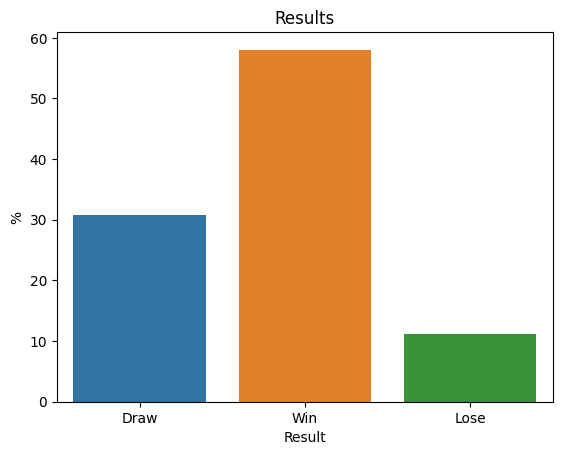

In [30]:
sns.barplot(x= df_fisher['resultado'].value_counts().index, y= df_fisher['resultado'].value_counts(normalize= True).values * 100, palette= 'tab10', order= ['Draw', 'Win', 'Lose'])
plt.title('Results') 
plt.xlabel('Result')  
plt.ylabel('%')  
#plt.savefig('resultados_fisher.png', transparent= True)

fisher vs Spassky, Boris V

In [26]:
df_rival = df_fisher[(df_fisher['white'] == 'Spassky, Boris V') | (df_fisher['black'] == 'Spassky, Boris V')]
df_rival.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 272 to 826
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   56 non-null     int64         
 1   event        56 non-null     object        
 2   site         56 non-null     object        
 3   date_played  56 non-null     datetime64[ns]
 4   white        56 non-null     object        
 5   black        56 non-null     object        
 6   result       56 non-null     object        
 7   white_elo    51 non-null     float64       
 8   black_elo    51 non-null     float64       
 9   winner       56 non-null     object        
 10  loser        56 non-null     object        
 11  resultado    56 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 5.7+ KB


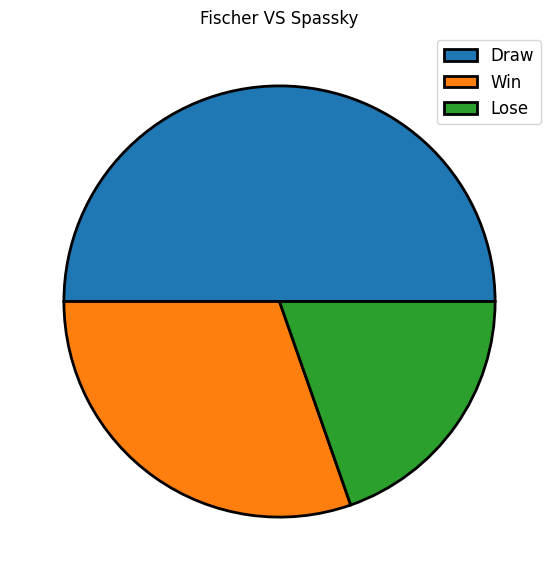

In [27]:
res_fischer_spassky = df_rival['resultado'].value_counts()

plt.figure(figsize= (7, 7))
plt.pie(res_fischer_spassky, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Fischer VS Spassky')
plt.legend(['Draw', 'Win', 'Lose'], loc= 'best', fontsize= 'large');
#plt.savefig('fischer_vs_spassky_pie.png', transparent= True)

In [28]:
res_fischer_spassky

resultado
Draw    28
Win     17
Lose    11
Name: count, dtype: int64

contra quien perdio fisher mas veces?

In [29]:
df_fisher[df_fisher['resultado'] == 'Defeat']['winner'].value_counts(normalize= True) * 100
# la mayor rivalidad de fischer fue contra spassky con 11 derrotas contra el (12%)

Series([], Name: proportion, dtype: float64)